# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import time
import seaborn as sns
import scipy.stats as st
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression 
from datetime import datetime
import datetime as dt

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

output_data_file = "output_data/cities.csv"


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | airai
Processing Record 2 of Set 1 | coruripe
Processing Record 3 of Set 1 | cayenne
Processing Record 4 of Set 1 | victoria
Processing Record 5 of Set 1 | chuy
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | klaksvik
Processing Record 9 of Set 1 | orbe
Processing Record 10 of Set 1 | sao filipe
Processing Record 11 of Set 1 | kavieng
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | upernavik
Processing Record 14 of Set 1 | port hedland
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | togitsu
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | vila franca do campo
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 | punta arenas


Processing Record 35 of Set 4 | anage
Processing Record 36 of Set 4 | russell
Processing Record 37 of Set 4 | castro
Processing Record 38 of Set 4 | tilichiki
Processing Record 39 of Set 4 | arraial do cabo
Processing Record 40 of Set 4 | thompson
Processing Record 41 of Set 4 | saint-michel-des-saints
Processing Record 42 of Set 4 | djambala
Processing Record 43 of Set 4 | nova aurora
Processing Record 44 of Set 4 | sur
Processing Record 45 of Set 4 | comodoro rivadavia
Processing Record 46 of Set 4 | necochea
Processing Record 47 of Set 4 | kununurra
Processing Record 48 of Set 4 | cockburn town
Processing Record 49 of Set 4 | babino
Processing Record 0 of Set 5 | pisco
Processing Record 1 of Set 5 | rio grande
Processing Record 2 of Set 5 | sarakhs
Processing Record 3 of Set 5 | coos bay
Processing Record 4 of Set 5 | chumikan
Processing Record 5 of Set 5 | saint-joseph
Processing Record 6 of Set 5 | martapura
Processing Record 7 of Set 5 | severo-kurilsk
Processing Record 8 of Set 

Processing Record 24 of Set 8 | kruisfontein
Processing Record 25 of Set 8 | poum
Processing Record 26 of Set 8 | jomalig
City not found. Skipping...
Processing Record 27 of Set 8 | nishihara
Processing Record 28 of Set 8 | stevens point
Processing Record 29 of Set 8 | nouadhibou
Processing Record 30 of Set 8 | ugoofaaru
Processing Record 31 of Set 8 | christchurch
Processing Record 32 of Set 8 | beira
Processing Record 33 of Set 8 | bahia honda
Processing Record 34 of Set 8 | hervey bay
Processing Record 35 of Set 8 | masjed-e soleyman
City not found. Skipping...
Processing Record 36 of Set 8 | markova
Processing Record 37 of Set 8 | basco
Processing Record 38 of Set 8 | altamont
Processing Record 39 of Set 8 | chojnow
Processing Record 40 of Set 8 | linxia
Processing Record 41 of Set 8 | darab
Processing Record 42 of Set 8 | fortuna
Processing Record 43 of Set 8 | san juan de los morros
Processing Record 44 of Set 8 | monaragala
Processing Record 45 of Set 8 | tual
Processing Record 

Processing Record 11 of Set 12 | panama city
Processing Record 12 of Set 12 | abu kamal
Processing Record 13 of Set 12 | khonuu
City not found. Skipping...
Processing Record 14 of Set 12 | svetlogorsk
Processing Record 15 of Set 12 | beohari
Processing Record 16 of Set 12 | vestmannaeyjar
Processing Record 17 of Set 12 | sri aman
Processing Record 18 of Set 12 | tautira
Processing Record 19 of Set 12 | inuvik
Processing Record 20 of Set 12 | goianesia
Processing Record 21 of Set 12 | paamiut
Processing Record 22 of Set 12 | stornoway
Processing Record 23 of Set 12 | frontera
Processing Record 24 of Set 12 | belushya guba
City not found. Skipping...
Processing Record 25 of Set 12 | khasan
Processing Record 26 of Set 12 | ouadda
Processing Record 27 of Set 12 | longlac
City not found. Skipping...
Processing Record 28 of Set 12 | tsaratanana
Processing Record 29 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 30 of Set 12 | itapema
Processing Record 31 of Set 12 | lua

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,airai,-8.9266,125.4092,295.40,73,20,1.08,TL,1681442249
1,coruripe,-10.1256,-36.1756,297.13,75,81,2.31,BR,1681442708
2,cayenne,4.9333,-52.3333,297.17,94,75,1.03,GF,1681442082
3,victoria,22.2855,114.1577,300.18,82,100,4.47,HK,1681442187
4,chuy,-33.6971,-53.4616,285.56,71,4,3.11,UY,1681442254


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,airai,-8.9266,125.4092,295.40,73,20,1.08,TL,1681442249
1,coruripe,-10.1256,-36.1756,297.13,75,81,2.31,BR,1681442708
2,cayenne,4.9333,-52.3333,297.17,94,75,1.03,GF,1681442082
3,victoria,22.2855,114.1577,300.18,82,100,4.47,HK,1681442187
4,chuy,-33.6971,-53.4616,285.56,71,4,3.11,UY,1681442254


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
from datetime import datetime
dateTimeObj = datetime.now()
datestamp = dateTimeObj.strftime("%d-%m-%y")
datestamp 

'13-04-23'

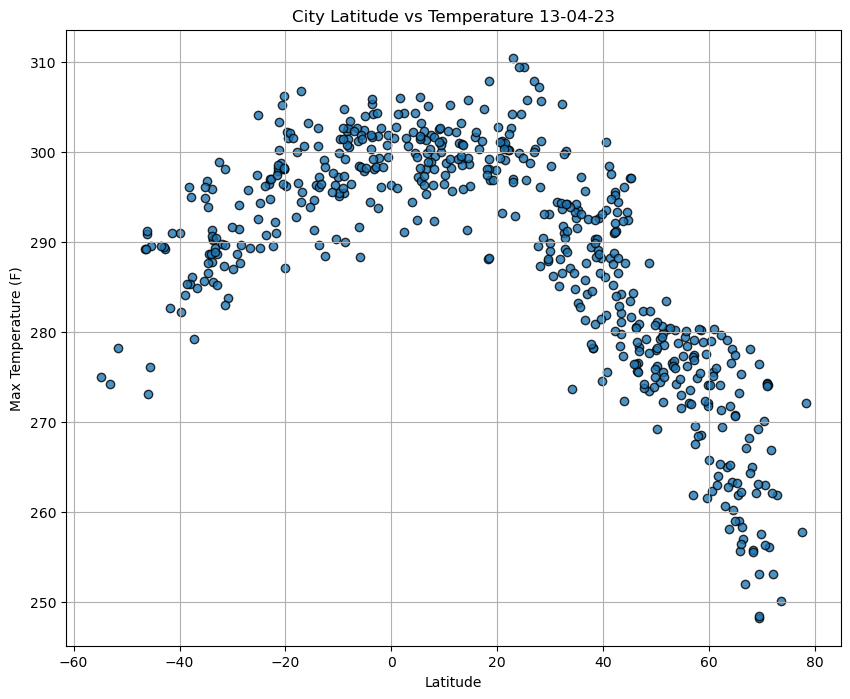

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Temperature {datestamp}")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

FileNotFoundError: [Errno 2] No such file or directory: 'Images/latitude_vs_humidity.png'

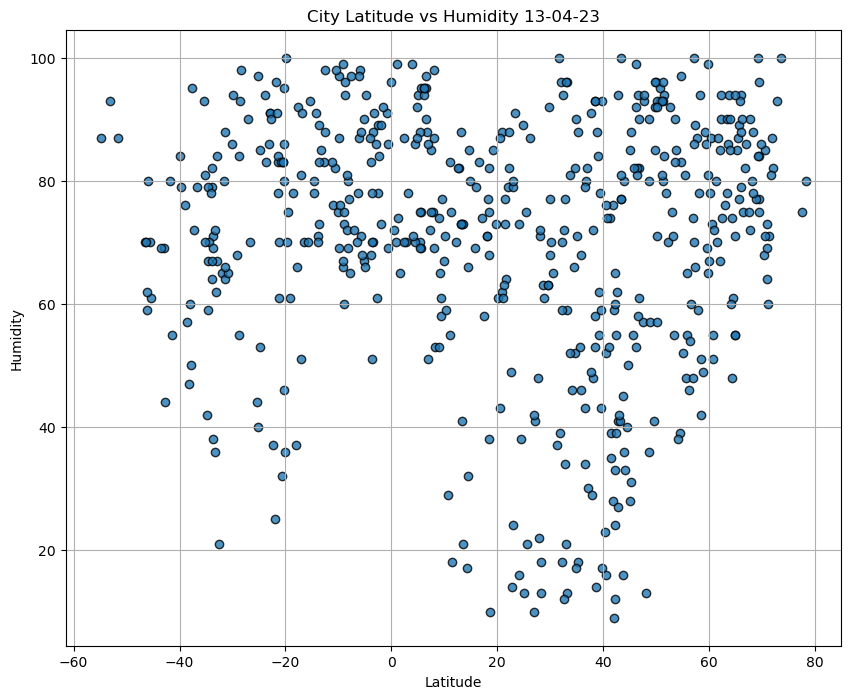

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'City Latitude vs Humidity {datestamp}')
plt.grid()
plt.savefig("Images/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

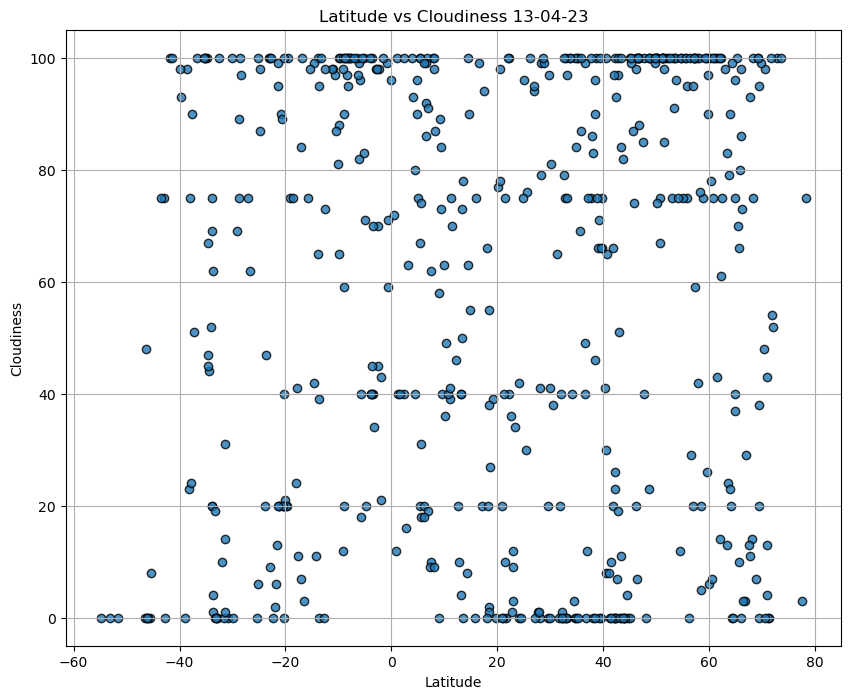

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Latitude vs Cloudiness {datestamp}')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

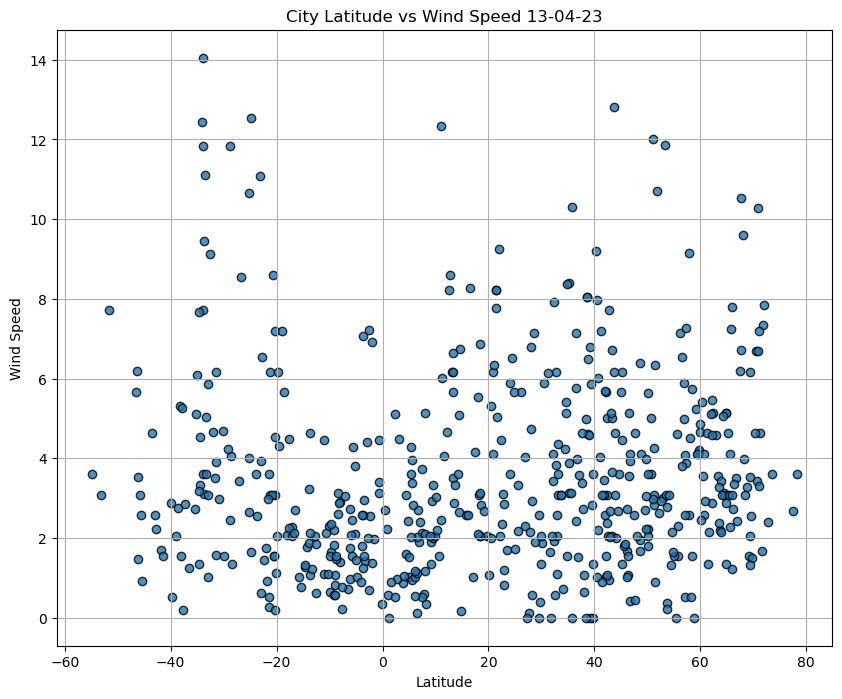

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'City Latitude vs Wind Speed {datestamp}')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,cayenne,4.9333,-52.3333,297.17,94,75,1.03,GF,1681442082
3,victoria,22.2855,114.1577,300.18,82,100,4.47,HK,1681442187
5,butaritari,3.0707,172.7902,300.57,78,63,4.48,KI,1681442240
7,klaksvik,62.2266,-6.5890,279.66,90,100,5.45,FO,1681442239
8,orbe,46.7250,6.5307,278.35,82,88,0.41,CH,1681442837


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,airai,-8.9266,125.4092,295.40,73,20,1.08,TL,1681442249
1,coruripe,-10.1256,-36.1756,297.13,75,81,2.31,BR,1681442708
4,chuy,-33.6971,-53.4616,285.56,71,4,3.11,UY,1681442254
6,hermanus,-34.4187,19.2345,288.65,70,44,4.53,ZA,1681442250
10,kavieng,-2.5744,150.7967,301.72,78,45,7.22,PG,1681442388


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7729388376758375
The correlation between both factors is -0.88


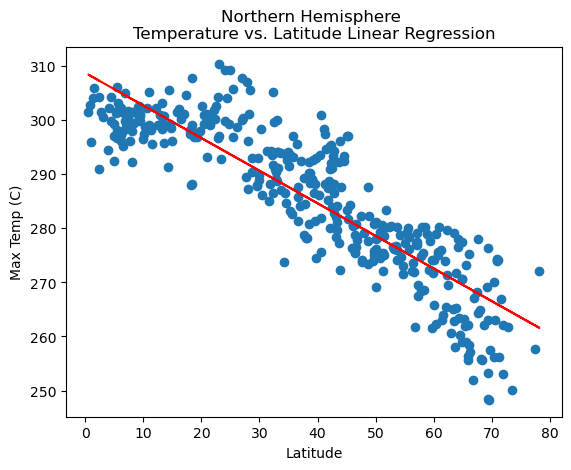

In [24]:
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemi_df["Max Temp"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = 10,240
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temp (C)")
    plt.title("Northern Hemisphere \nTemperature vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.savefig("../Images/north_temp_vs_lat.png", bbox_inches="tight")
    plt.show()
    
plotlinearregression(x_values, y_values, "Max Temp")

The r-value is: 0.5327284098326661
The correlation between both factors is 0.73


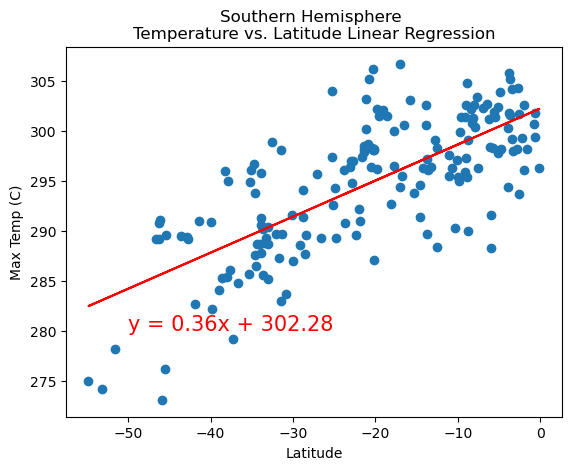

In the Northern Hemisphere, the max temp decreases when the latitude gets higher. However it is the opposite in the South as it gets hotter.
This means the closer to the equator, the hotter it gets.


<Figure size 640x480 with 0 Axes>

In [40]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemi_df["Max Temp"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = -50,280
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temp (C)")
    plt.title("Southern Hemisphere \nTemperature vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
   
    #plt.figure(figsize=(4,4))
    plt.show()
    plt.savefig("../Images/south_temp_vs_lat.png")#, bbox_inches="tight")
    
    
plotlinearregression(x_values, y_values, "Max Temp")

print("In the Northern Hemisphere, the max temp decreases when the latitude gets higher. However it is the opposite in the South as it gets hotter.")
print("This means the closer to the equator, the hotter it gets.")

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.013107367270456714
The correlation between both factors is 0.11


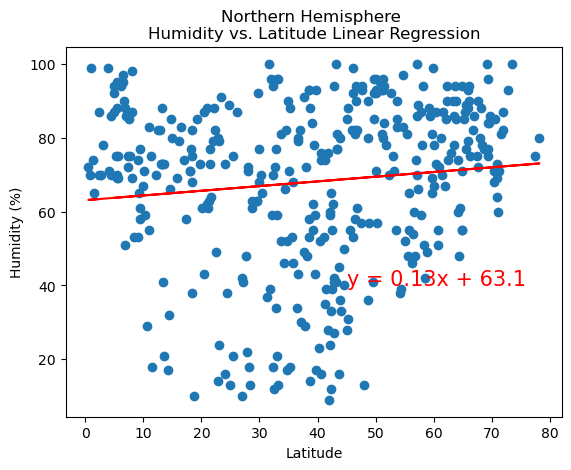

<Figure size 640x480 with 0 Axes>

In [27]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemi_df["Humidity"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = 45,40
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Humidity (%)")
    plt.title("Northern Hemisphere \nHumidity vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()
    
plotlinearregression(x_values, y_values, "Humidity")
plt.savefig("../Images/North_Humidity_vs_lat.png", bbox_inches="tight")
plt.show()

The r-value is: 0.06130937810108055
The correlation between both factors is 0.25


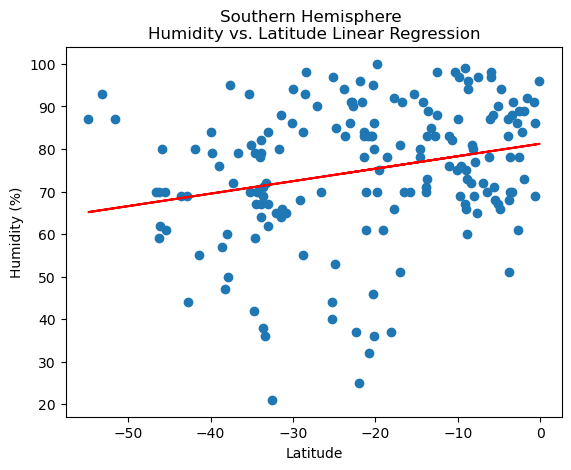

<Figure size 640x480 with 0 Axes>

In [29]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemi_df["Humidity"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = -50,10
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Humidity (%)")
    plt.title("Southern Hemisphere \nHumidity vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()

plotlinearregression(x_values, y_values, "Humidity")
plt.savefig("../Images/south_humidity_vs_lat.png", bbox_inches="tight")
plt.show()

print("According to the graphs, it looks like there isn't much correlation in city location or humdity.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.010096815886093418
The correlation between both factors is 0.1


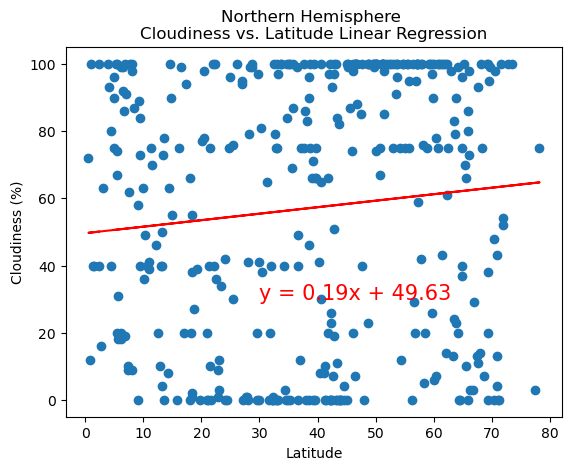

<Figure size 640x480 with 0 Axes>

In [33]:
x_values = pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemi_df["Cloudiness"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = 30,30
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness (%)")
    plt.title("Northern Hemisphere \nCloudiness vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()
    
plotlinearregression(x_values, y_values, "Cloudiness")
plt.savefig("../Images/Northern Cloudiness_vs_lat.png", bbox_inches="tight")
plt.show()

The r-value is: 0.12414045749570524
The correlation between both factors is 0.35


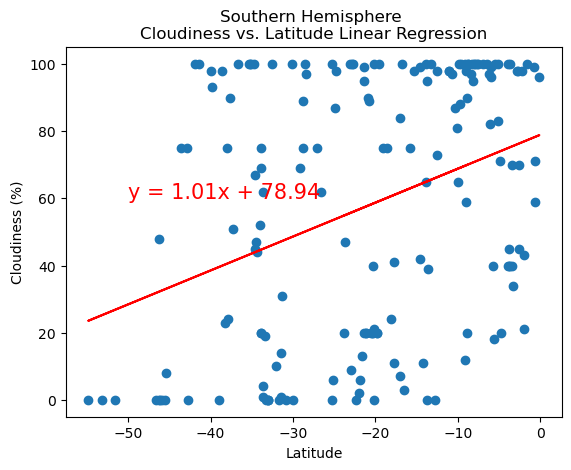

<Figure size 640x480 with 0 Axes>

According to the graph, there isn't much correlation here as well. The trend line does not go through many dots.
There isn't a strong connection between cloudiness and latitude.


In [42]:
x_values = pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemi_df["Cloudiness"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = -50,60
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness (%)")
    plt.title("Southern Hemisphere \nCloudiness vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()
    
plotlinearregression(x_values, y_values, "Cloudiness")
plt.savefig("../Images/Southern_Hemisphere_Cloudiness_vs_Lat.png", bbox_inches="tight")
plt.show()

print("According to the graph, there isn't much correlation here as well. The trend line does not go through many dots.")
print("There isn't a strong connection between cloudiness and latitude.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.023969303301552825
The correlation between both factors is 0.15


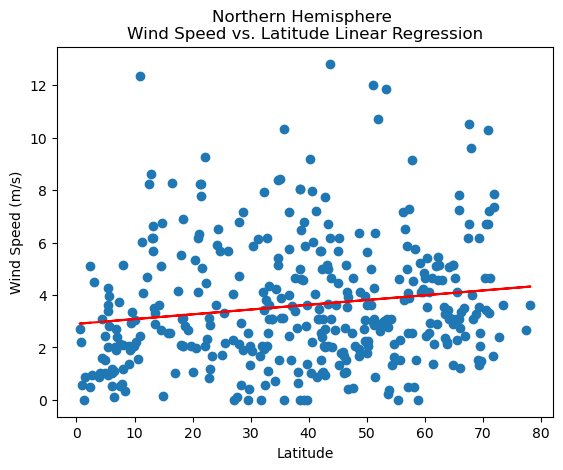

<Figure size 640x480 with 0 Axes>

In [31]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemi_df["Wind Speed"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = 20,20
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed (m/s)")
    plt.title("Northern Hemisphere \nWind Speed vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()
    
plotlinearregression(x_values, y_values, "Wind Speed")
plt.savefig("../Images/Northern_Hemisphere_Wind_Speed_vs_lat.png", bbox_inches="tight")
plt.show()

The r-value is: 0.08657078919943377
The correlation between both factors is -0.29


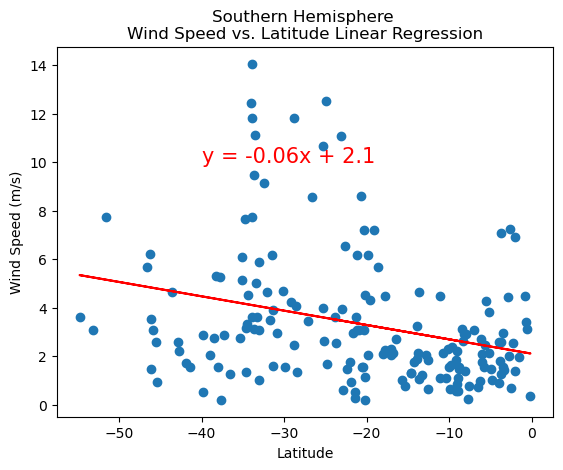

<Figure size 640x480 with 0 Axes>

There is another weak correlation. Wind speed looks to wild to be measured.


In [43]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemi_df["Wind Speed"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = -40,10
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed (m/s)")
    plt.title("Southern Hemisphere \nWind Speed vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()
    
plotlinearregression(x_values, y_values, "Wind Speed")
plt.savefig("../Images/Southern_Hemisphere_Wind_Speed_vs_lat.png", bbox_inches="tight")
plt.show()

print("There is another weak correlation. Wind speed looks to wild to be measured.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE